<div class="alert alert-success">
<h3><center>" NEURAL NETWORK BASED EPILEPTIC DETECTION by UCI Machine Learning "<center> </h4>
<ul>
<li style="text-align: left;">
<h3><strong>NAMA &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp; : LISA MELINDA</strong></h3>    
<li style="text-align: left;">
<h3><strong>KELAS &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp; : SK 5B</strong></h3>
</li>
<li style="text-align: left;">
<h3><strong>JURUSAN &emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;: SISTEM KOMPUTER</strong></h3>
</li>
<li style="text-align: left;">
<h3><strong>MATA KULIAH &emsp;&emsp;&emsp; : KECERDASAN BUATAN</strong></h3>
</li>
<li style="text-align: left;">
<h3><strong>DOSEN PENGAMPUH: Prof. Siti Nurmaini</strong></h3>
</li>
</ul>
</div>

<div class="alert alert-success">
 <font size="3"><p align="justify">
    <strong>Dibawah ini adalah daftar Modul yang digunakan :</strong>
<ul>
<li style="text-align: left;">
    <strong>Numpy =</strong> Modul ini berfungsi untuk melakukan beberapa fungsi matematika seperti array, dan matriks. Pada program ini numpy digunakan untuk generate array untuk membuat grafik confusion matriks.
</li> 
</ul>

<ul>
<li style="text-align: left;">
<strong>Pandas =</strong> Modul ini akan digunakan untuk Load Dataset.
</li>
</ul>
  
<ul>
<li style="text-align: left;">
<strong>Matplotlib =</strong> Modul ini digunakan untuk mencetak grafik pada beberapa event seperti grafik distribusi variabel, grafik confusion matrix dan grafik akurasi.
</li>
</ul>

<ul>
<li style="text-align: left;">
<strong>Sklearn =</strong> Modul ini digunakan untuk mengolah data Machine Learning seperti preprocessing.
</li>
</ul>

<ul>
<li style="text-align: left;">
<strong>Keras =</strong> Modul ini digunakan untuk membuat, menambah, dan mengevaluasi model neural network.
</li>
</ul>

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<div class="alert alert-info">
<h2> <center> Import Dataset
    

<div class="alert alert-success">
<h3>Code di bawah ini digunakan untuk load dataset dengan nama "dataset.csv" yang berisi data epilepsi</h3>    
<div>

In [3]:
dataset = pd.read_csv('data.csv')

<div class="alert alert-success">
 <font size="3"><p align="justify"><strong>Berikut adalah spesifikasi dataset yang digunakan :</strong>
<ul>
<li style="text-align: left;">
    Input terdiri dari 13 variabel dengan berbagai indikator yang sesuai dengan permasalahan yang akan di bahas.
</li> 
</ul>

<ul>
<li style="text-align: left;">
Output terdiri dari 1 variabel, dengan 5 kondisi, yaitu 1,2,3,4,5. Tetapi, kita gunakan 0 dan 1. 0 berarti tidak ada kejangan dan 1 berarti terdeteksi kejangan
</li>
</ul>
    
<div>

In [4]:
dataset.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [5]:
dataset.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [6]:
X = dataset.iloc[:, 1:179].values
y = dataset.iloc[:, 179:].values

In [7]:
for i in range(len(y)):
    if y[i] == 1:
        y[i] = 1
    else:
        y[i] = 0


In [8]:
data = pd.DataFrame(X)
data

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
5,55,28,18,16,16,19,25,40,52,66,...,-6,-12,-31,-42,-54,-60,-64,-60,-56,-55
6,-55,-9,52,111,135,129,103,72,37,0,...,-137,-125,-99,-79,-62,-41,-26,11,67,128
7,1,-2,-8,-11,-12,-17,-15,-16,-18,-17,...,-67,-79,-91,-97,-88,-76,-72,-66,-57,-39
8,-278,-246,-215,-191,-177,-167,-157,-139,-118,-92,...,-386,-400,-379,-336,-281,-226,-174,-125,-79,-40
9,8,15,13,3,-6,-8,-5,4,25,41,...,65,49,31,11,-5,-17,-19,-15,-15,-11


In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Asus\.conda\envs\tensorflow-session\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Asus\.conda\envs\tensorflow-session\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Asus\.conda\envs\tensorflow-session\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
#Importing keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [12]:
#Initializing the ANN
model = Sequential()

<div class="alert alert-success">
<h3>Karena menggunakan output 1 dan 0 maka kita menggunakan binary crossentropy</h3>    
<div>

In [14]:
#Compiling the ANN
History = model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 80)                14320     
_________________________________________________________________
dense_2 (Dense)              (None, 80)                6480      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 81        
Total params: 20,881
Trainable params: 20,881
Non-trainable params: 0
_________________________________________________________________


In [16]:
#Fitting the ANN to the training set
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 128, nb_epoch = 40)

C:\Users\Asus\.conda\envs\tensorflow-session\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 9200 samples, validate on 2300 samples
Epoch 1/40
9200/9200 [==============================] - 3s 290us/step - loss: 0.5034 - acc: 0.8991 - val_loss: 0.2596 - val_acc: 0.9530
Epoch 2/40
9200/9200 [==============================] - 1s 56us/step - loss: 0.1920 - acc: 0.9605 - val_loss: 0.1504 - val_acc: 0.9735
Epoch 3/40
9200/9200 [==============================] - 0s 52us/step - loss: 0.1177 - acc: 0.9704 - val_loss: 0.1256 - val_acc: 0.9691
Epoch 4/40
9200/9200 [==============================] - 0s 54us/step - loss: 0.0866 - acc: 0.9757 - val_loss: 0.1041 - val_acc: 0.9739
Epoch 5/40
9200/9200 [==============================] - 1s 58us/step - loss: 0.0734 - acc: 0.9775 - val_loss: 0.1048 - val_acc: 0.9726
Epoch 6/40
9200/9200 [==============================] - 0s 50us/step - loss: 0.0660 - acc: 0.9793 - val_loss: 0.0992 - val_acc: 0.9774
Epoch 7/40
9200/9200 [==============================] - 0s 51us/step - loss: 0.0551 - acc: 0.9837 - val_loss: 0.0929 - val_acc: 0.9722
Epoch 

In [17]:
predict = model.predict(X_train)
predict

array([[7.6368669e-06],
       [2.5781771e-06],
       [1.0181948e-03],
       ...,
       [1.3277475e-05],
       [1.0000000e+00],
       [1.0000000e+00]], dtype=float32)

In [18]:
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

9200/9200 [==============================] - 0s 49us/step

acc: 99.89%


<div class="alert alert-info">
<h3><center> Pada paper akurasinya adalah sebesar 99,89%

In [19]:
print(scores[1])

0.9989130434782608


In [20]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)


In [21]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1831   23]
 [  37  409]]


In [22]:
#Akurasi = TN+TP / TN+TP+FN+FP
accuracy = ((1835+405) / (1835+41+405+19))
print("\n%s: %.2f%%" % ("Accuracy", accuracy*100))


Accuracy: 97.39%


In [23]:
#RECALL = TP / FN+TP
recall = ((405) / (405+41))
print("\n%s: %.2f%%" % ("Recall", recall*100))
#TRUENEGATIF = FP/TN+FP
TrueNegatifRate = ((19) / (1835+19))
print("\n%s: %.2f%%" % ("TrueNegatifRate",TrueNegatifRate))
#PRECISSION = TP/ FP+TP
precission =((405) / (405+19))
print("\n%s: %.2f%%" % ("precission", precission*100))


Recall: 90.81%

TrueNegatifRate: 0.01%

precission: 95.52%


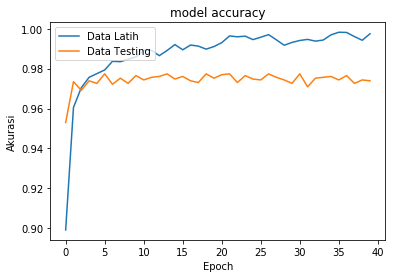

In [24]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Data Latih', 'Data Testing'], loc='upper left')
plt.show()

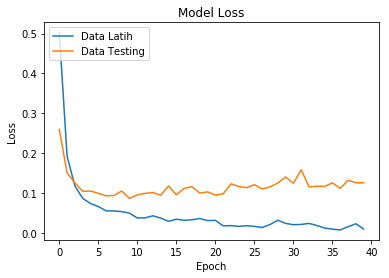

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Data Latih', 'Data Testing'], loc='upper left')
plt.show()